In [1]:
import pandas as pd
import numpy as np

data = pd.ExcelFile('Data-All.xlsx')
print(data.sheet_names)
df1 = data.parse('Sheet1')
df1.info()

['Sheet1']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39782 entries, 0 to 39781
Data columns (total 34 columns):
Claim                               39782 non-null int64
Effective Year                      39782 non-null int64
Account                             39782 non-null int64
Market                              39782 non-null object
Sex                                 39778 non-null object
Jurisdiction State                  39781 non-null object
Accident State                      39782 non-null object
Classcode                           39782 non-null object
Class Desription                    39606 non-null object
Occupation                          39782 non-null object
Date of Birth                       39781 non-null datetime64[ns]
Date of Hire                        39782 non-null datetime64[ns]
Accident Date                       39782 non-null datetime64[ns]
Experience Years                    39782 non-null float64
Age at Accident Date                39782 non-

In [2]:
# Replace the spaces in clumn names to underscore 

df1.columns = df1.columns.str.replace(' ','_')

# conver column headers to lower case

df1.columns = df1.columns.str.lower()

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39782 entries, 0 to 39781
Data columns (total 34 columns):
claim                               39782 non-null int64
effective_year                      39782 non-null int64
account                             39782 non-null int64
market                              39782 non-null object
sex                                 39778 non-null object
jurisdiction_state                  39781 non-null object
accident_state                      39782 non-null object
classcode                           39782 non-null object
class_desription                    39606 non-null object
occupation                          39782 non-null object
date_of_birth                       39781 non-null datetime64[ns]
date_of_hire                        39782 non-null datetime64[ns]
accident_date                       39782 non-null datetime64[ns]
experience_years                    39782 non-null float64
age_at_accident_date                39782 non-null float6

In [89]:
# Removal of top of four rows
df2 = df1[4:]
df2.shape

(39778, 34)

In [90]:
# Features to be removed from the data
print('Removing features...')
print(df2.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]])
df2.drop(df2.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]], axis=1, inplace=True)

Removing features...
Index(['claim', 'effective_year', 'account', 'jurisdiction_state',
       'class_desription', 'date_of_birth', 'date_of_hire', 'accident_date',
       'date_reported_to_employer', 'report_date', 'date_of_disability',
       'date_returened_to_work', 'claim_description', 'claim_status',
       'type_of_injury_code', 'body_part', 'cause_of_injury',
       'nature_of_injury_group', 'total_incurred_amount', 'indemnity',
       'medical', 'expenses', 'sum_(medical-indemnity-expenses)'],
      dtype='object')


In [91]:
text_label = df2['case_of_injury_group'].unique()
text_label

array(['Fall, Slip, or Trip Injury', 'Struck or Injured by',
       'Striking Against or Stepping On', 'Miscellaneous', 'Vehicle',
       'Caught In, Under, or Between', 'Strain or Injury by',
       'Heat or Cold Exposures', 'Cut, Puncture, Scrape',
       'Rubbed or Abraded by', 'Lifting or Handling'], dtype=object)

In [94]:
check = df2['case_of_injury_group'].value_counts()
check

Strain or Injury by                10516
Fall, Slip, or Trip Injury          8855
Struck or Injured by                5888
Cut, Puncture, Scrape               4261
Miscellaneous                       4034
Caught In, Under, or Between        1477
Heat or Cold Exposures              1408
Striking Against or Stepping On     1280
Vehicle                             1265
Lifting or Handling                  735
Rubbed or Abraded by                  59
Name: case_of_injury_group, dtype: int64

In [95]:
# Standardization of features
df2["experience_years"] = (df2["experience_years"]-df2["experience_years"].min()) / (df2["experience_years"].max()-df2["experience_years"].min())
df2["age_at_accident_date"] = (df2["age_at_accident_date"]-df2["age_at_accident_date"].min()) / (df2["age_at_accident_date"].max()-df2["age_at_accident_date"].min())

C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df2['market'] = LE.fit_transform(df2['market'])
df2['type_of_injury'] = LE.fit_transform(df2['type_of_injury'])
df2['case_of_injury_group'] = LE.fit_transform(df2['case_of_injury_group'])
df2['nature_of_injury'] = LE.fit_transform(df2['nature_of_injury'])
df2['body_part_group'] = LE.fit_transform(df2['body_part_group'])
df2['occupation'] = LE.fit_transform(df2['occupation'].astype(str))
df2['accident_state'] = LE.fit_transform(df2['accident_state'])
df2['sex'] = LE.fit_transform(df2['sex'])
df2['classcode'] = LE.fit_transform(df2['classcode'].astype(str))

C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [97]:
df2.head()

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
4,36,1,22,84,7116,0.552271,0.589935,4,4,2,32
5,36,1,45,84,7903,0.557574,0.746223,2,1,2,32
6,25,1,2,13,4020,0.447336,0.506133,0,3,9,32
7,23,1,2,13,4472,0.429462,0.567563,2,1,9,32
8,23,0,2,13,5428,0.429266,0.626362,6,3,2,32


In [98]:
# Standardization

df2["nature_of_injury"] = (df2["nature_of_injury"]-df2["nature_of_injury"].min()) / (df2["nature_of_injury"].max()-df2["nature_of_injury"].min())
df2["accident_state"] = (df2["accident_state"]-df2["accident_state"].min()) / (df2["accident_state"].max()-df2["accident_state"].min())
df2["type_of_injury"] = (df2["type_of_injury"]-df2["type_of_injury"].min()) / (df2["type_of_injury"].max()-df2["type_of_injury"].min())
df2["occupation"] = (df2["occupation"]-df2["occupation"].min()) / (df2["occupation"].max()-df2["occupation"].min())
df2["classcode"] = (df2["classcode"]-df2["classcode"].min()) / (df2["classcode"].max()-df2["classcode"].min())
df2["body_part_group"] = (df2["body_part_group"]-df2["body_part_group"].min()) / (df2["body_part_group"].max()-df2["body_part_group"].min())
df2["market"] = (df2["market"]-df2["market"].min()) / (df2["market"].max()-df2["market"].min())
df2["sex"] = (df2["sex"]-df2["sex"].min()) / (df2["sex"].max()-df2["sex"].min())

C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [99]:
df2.head()

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
4,0.750000,0.5,0.44,0.340081,0.846941,0.552271,0.589935,0.666667,0.666667,2,0.666667
5,0.750000,0.5,0.90,0.340081,0.940609,0.557574,0.746223,0.333333,0.166667,2,0.666667
6,0.520833,0.5,0.04,0.052632,0.478458,0.447336,0.506133,0.000000,0.500000,9,0.666667
7,0.479167,0.5,0.04,0.052632,0.532254,0.429462,0.567563,0.333333,0.166667,9,0.666667
8,0.479167,0.0,0.04,0.052632,0.646037,0.429266,0.626362,1.000000,0.500000,2,0.666667


In [100]:
# Feature Correlation
df2.corr(method ='pearson')

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
market,1.000000,-0.131597,0.109921,0.317179,-0.029120,-0.015806,-0.060835,-0.015982,-0.011531,-0.011809,-0.014372
sex,-0.131597,1.000000,0.020156,-0.105069,0.089458,0.080778,0.063338,0.042260,0.001403,0.012479,0.027144
accident_state,0.109921,0.020156,1.000000,0.056966,0.024671,-0.007173,-0.017375,0.003359,0.008263,-0.004627,0.009759
classcode,0.317179,-0.105069,0.056966,1.000000,-0.015085,-0.012633,-0.045848,-0.017142,-0.046594,0.032277,-0.008003
occupation,-0.029120,0.089458,0.024671,-0.015085,1.000000,0.023730,0.023205,-0.002473,0.009482,0.000827,0.014629
experience_years,-0.015806,0.080778,-0.007173,-0.012633,0.023730,1.000000,0.392006,0.020766,0.012814,0.001912,0.028123
age_at_accident_date,-0.060835,0.063338,-0.017375,-0.045848,0.023205,0.392006,1.000000,0.120087,0.022330,-0.007908,0.047754
type_of_injury,-0.015982,0.042260,0.003359,-0.017142,-0.002473,0.020766,0.120087,1.000000,0.040702,0.011652,0.069965
body_part_group,-0.011531,0.001403,0.008263,-0.046594,0.009482,0.012814,0.022330,0.040702,1.000000,-0.092311,0.204764
case_of_injury_group,-0.011809,0.012479,-0.004627,0.032277,0.000827,0.001912,-0.007908,0.011652,-0.092311,1.000000,0.086162


In [101]:
features = df2.drop('case_of_injury_group', 1)
labels = df2[['case_of_injury_group']]


In [102]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print('Number of train and test data:')
print(number_of_train, number_of_test)

Number of train and test data:
31822 7956


In [103]:
Y_train[0:5]

,case_of_injury_group
7905,1
25726,5
16913,5
30376,5
733,9


In [104]:
from keras.utils import to_categorical
#one-hot encode target column
train_y_2 = to_categorical(Y_train)
test_y_2 = to_categorical(Y_test)

#vcheck that target column has been converted
train_y_2[0:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model.add(Dense(150, activation='relu', input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))

model.add(Dense(11, activation='softmax'))


In [106]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience=10)

#train model
model.fit(X_train, train_y_2, epochs=10, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 25457 samples, validate on 6365 samples
Epoch 1/10
25457/25457 [==============================] - 5s 177us/step - loss: 1.5837 - acc: 0.4350 - val_loss: 1.4434 - val_acc: 0.4913
Epoch 2/10
25457/25457 [==============================] - 3s 136us/step - loss: 1.4037 - acc: 0.5126 - val_loss: 1.3256 - val_acc: 0.5394
Epoch 3/10
25457/25457 [==============================] - 4s 141us/step - loss: 1.3470 - acc: 0.5317 - val_loss: 1.3389 - val_acc: 0.5334
Epoch 4/10
25457/25457 [==============================] - 4s 148us/step - loss: 1.3125 - acc: 0.5408 - val_loss: 1.3158 - val_acc: 0.5331
Epoch 5/10
25457/25457 [==============================] - 4s 145us/step - loss: 1.3023 - acc: 0.5425 - val_loss: 1.3124 - val_acc: 0.5439
Epoch 6/10
25457/25457 [==============================] - 3s 136us/step - loss: 1.2836 - acc: 0.5485 - val_loss: 1.2512 - val_acc: 0.5595
Epoch 7/10
25457/25457 [==============================] - 4s 140us/step - loss: 1.2694 - acc: 0.5510 - val_loss: 1.2633 - v

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 150)               1650      
_________________________________________________________________
dense_37 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_38 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_40 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_41 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_42 (Dense)             (None, 11)                1661      
Total para

In [109]:
y_score = model.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y_2.argmax(axis=1), y_score.argmax(axis=1))
print(cnf_matrix)

[[   0   71   85    0    0   29    0   19    0  100    1]
 [   0  709   26    0    0   19    0    5    0   95    1]
 [   0   52  699    3    0   84    0  771    0  134   16]
 [   0    3   16  230    0   24    0    7    0    6    4]
 [   0   34   31    0    0    8    0    7    0   56    0]
 [   0   43  103   16    0  540    0   72    0   65   17]
 [   0    2    0    1    0    2    0    4    0    1    0]
 [   0   11   58   13    0   67    0 1932    0   15    3]
 [   0   35   78    1    0   13    0   35    0   90    0]
 [   0  138  455    1    0  126    0  127    0  311    2]
 [   0    6   73    1    0   53    0   62    0   24   15]]


Normalized confusion matrix


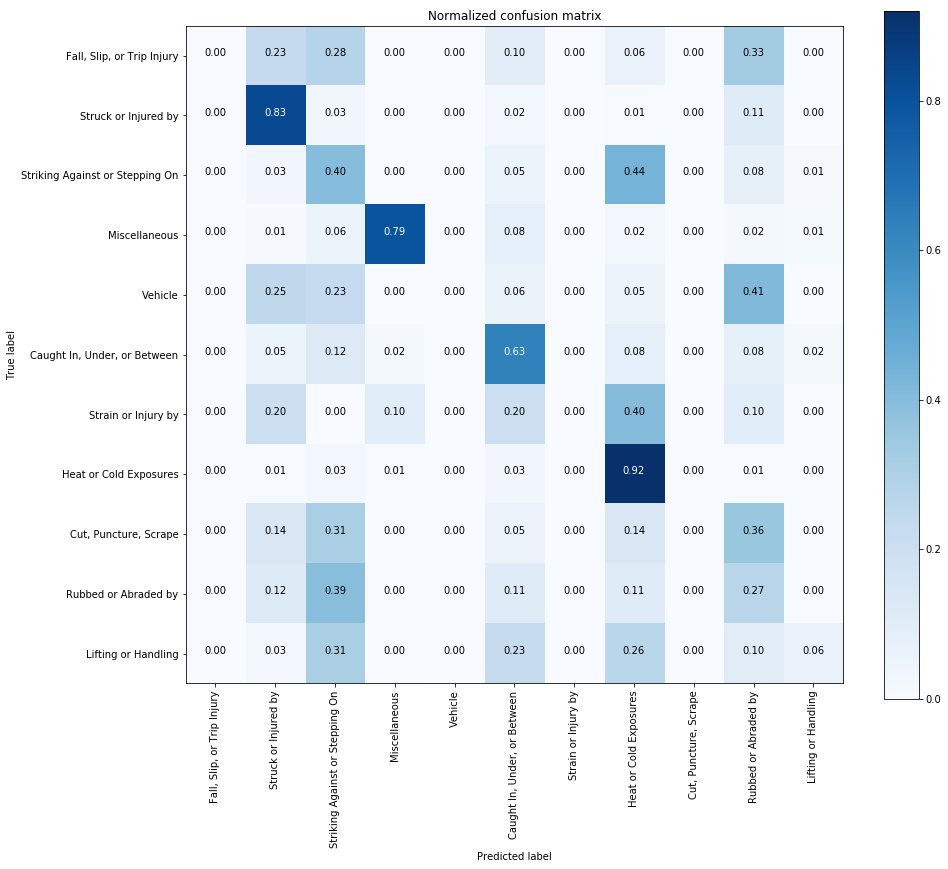

In [112]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#y_pred = model.predict(x_test);
#cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(text_label), normalize=True,
                      title='Normalized confusion matrix')

#fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)


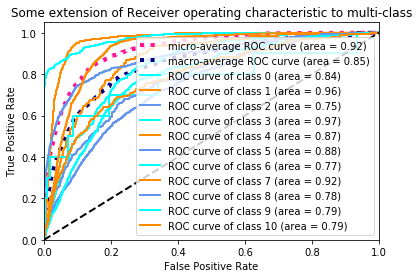

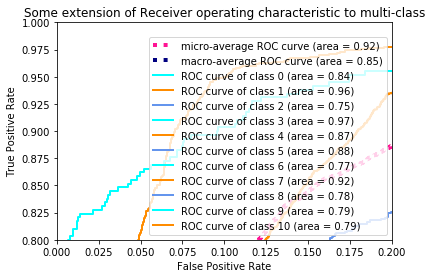

In [113]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 11

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()